# Multiclass Text Classification

# **Step 1 read dataset and explore**

In [36]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv('/home/pranita/PRANITA/M.Tech(CDAC)/ML/files/Consumer_Complaints.csv')
df.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/14/2019,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",NC,27519,NaN,Consent not provided,Web,03/14/2019,Closed with explanation,Yes,NaN,3179505.0
1,03/14/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CURO Intermediate Holdings,AZ,85040,NaN,NaN,Web,03/14/2019,Closed with explanation,Yes,NaN,3179861.0
2,03/14/2019,Vehicle loan or lease,Loan,Problem with a credit reporting company's inve...,Problem with personal statement of dispute,NaN,NaN,ALLY FINANCIAL INC.,MS,397XX,NaN,NaN,Web,03/14/2019,In progress,Yes,NaN,3179198.0
3,03/14/2019,Vehicle loan or lease,Loan,Improper use of your report,Reporting company used your report improperly,NaN,NaN,ALLY FINANCIAL INC.,MI,484XX,NaN,NaN,Referral,03/14/2019,In progress,Yes,NaN,3179501.0
4,03/14/2019,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Bonneville Billing and Collections,FL,330XX,NaN,NaN,Web,03/14/2019,Closed with explanation,Yes,NaN,3179976.0


# step2 : input output extraction

In [38]:
from io import StringIO
col = ['Product','Consumer complaint narrative']
df = df[col]
# Non null values extraction
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns=['Product','Consumer_complaint_narrative']


In [39]:
df.head()

,Product,Consumer_complaint_narrative
5225,Debt collection,I have repeatedly tried to have company verify...
5552,Debt collection,Perfection Collection XXXX XXXX XXXX XXXX XXXX...
5761,Debt collection,ability recovery services had put a collection...
5814,"Credit reporting, credit repair services, or o...",My credit report showed me a hard inquiry made...
6289,Debt collection,XXXX XXXX XXXX is reporting a collection for X...


In [40]:
df['Product'].unique()

array(['Debt collection',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Checking or savings account', 'Student loan',
       'Credit card or prepaid card', 'Mortgage', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan',
       'Money transfer, virtual currency, or money service'], dtype=object)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52529 entries, 5225 to 141887
Data columns (total 2 columns):
Product                         52529 non-null object
Consumer_complaint_narrative    52529 non-null object
dtypes: object(2)
memory usage: 1.2+ MB


In [42]:
# To category the perticular product
df['category_id']= df['Product'].factorize()[0]

In [43]:
df.head()

,Product,Consumer_complaint_narrative,category_id
5225,Debt collection,I have repeatedly tried to have company verify...,0
5552,Debt collection,Perfection Collection XXXX XXXX XXXX XXXX XXXX...,0
5761,Debt collection,ability recovery services had put a collection...,0
5814,"Credit reporting, credit repair services, or o...",My credit report showed me a hard inquiry made...,1
6289,Debt collection,XXXX XXXX XXXX is reporting a collection for X...,0


In [44]:
category_id_df=df[['Product','category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,Product,category_id
5225,Debt collection,0
5814,"Credit reporting, credit repair services, or o...",1
6385,Checking or savings account,2
7727,Student loan,3
8139,Credit card or prepaid card,4
8539,Mortgage,5
9834,Vehicle loan or lease,6
10593,"Payday loan, title loan, or personal loan",7
11587,"Money transfer, virtual currency, or money ser...",8


In [45]:
category_to_id=dict(category_id_df.values)
id_to_category=dict(category_id_df[['category_id','Product']].values)
id_to_category
df.head()

,Product,Consumer_complaint_narrative,category_id
5225,Debt collection,I have repeatedly tried to have company verify...,0
5552,Debt collection,Perfection Collection XXXX XXXX XXXX XXXX XXXX...,0
5761,Debt collection,ability recovery services had put a collection...,0
5814,"Credit reporting, credit repair services, or o...",My credit report showed me a hard inquiry made...,1
6289,Debt collection,XXXX XXXX XXXX is reporting a collection for X...,0


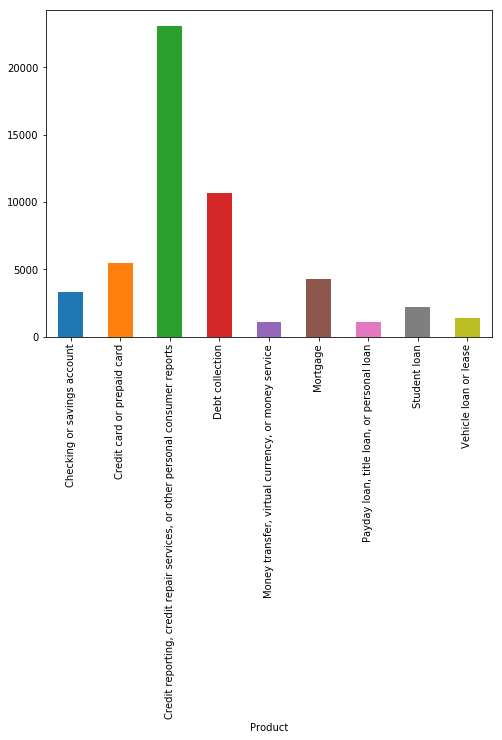

In [46]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [47]:
#terms frequency and inverce de frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2',encoding='latin-1',ngram_range=(1,2),stop_words='english')
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='latin-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [48]:
features=tfidf.fit_transform(df.Consumer_complaint_narrative)

In [49]:
labels=df.category_id
features.shape

(52529, 131712)

In [53]:
'''chi2 test measures dependance between variables so using this function "weeds out" the feature that are the most
 likely to be independent of class and threfore irrelavant for classification'''

from sklearn.feature_selection import chi2
import numpy as np
N=2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2=chi2(features,labels==category_id)
    indices=np.argsort(features_chi2[0])
    feature_names=np.array(tfidf.get_feature_names())[indices]
    #unigrams - seperate each words by space
    #bigrams - seperate each 2 words and group 2 words
    unigrams=[v for v in feature_names if len(v.split(' '))==1]
    bigrams=[v for v in feature_names if len(v.split(' '))==2]
    print("# '{}':".format(Product))
    print(" . Most correlated unigrams:\n. {}".format('\n.'.join(unigrams[-N:])))
    print(" . Most correlated bigrams:\n. {}".format('\n.'.join(unigrams[-N:])))

# 'Checking or savings account':
 . Most correlated unigrams:
. overdraft
.deposit
 . Most correlated bigrams:
. overdraft
.deposit
# 'Credit card or prepaid card':
 . Most correlated unigrams:
. express
.card
 . Most correlated bigrams:
. express
.card
# 'Credit reporting, credit repair services, or other personal consumer reports':
 . Most correlated unigrams:
. experian
.report
 . Most correlated bigrams:
. experian
.report
# 'Debt collection':
 . Most correlated unigrams:
. collection
.debt
 . Most correlated bigrams:
. collection
.debt
# 'Money transfer, virtual currency, or money service':
 . Most correlated unigrams:
. western
.paypal
 . Most correlated bigrams:
. western
.paypal
# 'Mortgage':
 . Most correlated unigrams:
. modification
.mortgage
 . Most correlated bigrams:
. modification
.mortgage
# 'Payday loan, title loan, or personal loan':
 . Most correlated unigrams:
. borrowed
.payday
 . Most correlated bigrams:
. borrowed
.payday
# 'Student loan':
 . Most correlated unig

# multinomial NB

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [55]:
xTrain,xTest,yTrain,yTest=train_test_split(df['Consumer_complaint_narrative'],df['Product'],random_state=0)
count_vect=CountVectorizer()
xTrainCount=count_vect.fit_transform(xTrain)
tfidf_transformer = TfidfTransformer()
xTrain_tfidf=tfidf_transformer.fit_transform(xTrainCount)
clf=MultinomialNB()
clf.fit(xTrain_tfidf,yTrain)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
print(clf.predict(count_vect.transform(["Problem with a credit reporting company's investigation into an existing problem"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [63]:
from sklearn.svm import LinearSVC#support vector machine
model=LinearSVC()
xTrain,xTest,yTrain,yTest,indices_train,indices_test=train_test_split(features, labels,df.index,test_size=0.33,random_state=0)
model.fit(xTrain,yTrain)
y_pred=model.predict(xTest)

#svc->score
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(yTest,y_pred)
conf_mat

array([[2907,  371,   29,   29,   60,   45,   32,   15,    8],
       [ 279, 7115,   15,   26,   97,   28,   32,    5,    4],
       [  17,   24,  922,    0,   79,    6,    2,    2,   29],
       [  43,   68,    1,  589,    6,    9,    1,    7,    0],
       [  74,  199,   62,    4, 1482,    9,    5,    2,   10],
       [  25,   53,   11,   12,   14, 1321,    4,    3,    2],
       [  48,  105,    5,    6,   21,   17,  256,    5,    1],
       [  75,   30,   12,   12,   18,   14,    6,  157,    4],
       [  11,   11,   83,    1,   22,    3,    0,    0,  218]])

In [66]:
import seaborn as sns
fig,ax=plt.subplot(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='d')

AttributeError: Unknown property figsize

<Figure size 432x288 with 0 Axes>